In [55]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [57]:
# Define the grid
a, b = 2, 2
nx, ny = 70, 70
dx, dy = a / (nx - 1), b / (ny - 1)
x = np.linspace(0, a, nx)
y = np.linspace(0, b, ny)
X, Y = np.meshgrid(x, y)

In [59]:
# Define boundary conditions as a function
def set_boundary_conditions(V, nx, ny):
    # Set all boundaries to 0 (large plate with potential 0)
    V[:, 0] = 0  # Left boundary
    V[0, :] = 0  # Bottom boundary
    # Set Dirichlet boundary condition for removed square (potential 1)
    for i in range(ny//2, ny):
        for j in range(nx//2, nx):
            V[i, j] = 1

    # Apply Neumann boundary conditions (zero derivative)
    # Top boundary
    for j in range(1, nx-1):
        V[-1, j] = V[-2, j]
    # Right boundary
    for i in range(1, ny-1):
        V[i, -1] = V[i, -2]

# Solve the Laplace equation numerically
def solve_laplace(nx, ny, tol=1e-4):
    V = np.zeros((ny, nx))
    # Set initial boundary conditions
    set_boundary_conditions(V, nx, ny)
    
    error = tol + 1
    iterations = 0
    V_over_time = [V.copy()]
    while error > tol:
        V_old = V.copy()
        for i in range(1, ny-1):
            for j in range(1, nx-1):
                if not (i >= ny//2 and j >= nx//2):  # Skip removed square
                    V[i, j] = 0.25 * (V_old[i+1, j] + V[i-1, j] + V_old[i, j+1] + V[i, j-1])

        # Reapply boundary conditions after updating
        set_boundary_conditions(V, nx, ny)
        error = np.max(np.abs(V - V_old))
        iterations += 1
        V_over_time.append(V.copy())

    return V,V_over_time, iterations


# Compute the electric field
def compute_electric_field(V, dx, dy):
    Ex = - (V[2:, 1:-1] - V[:-2, 1:-1]) / (2 * dx)
    Ey = - (V[1:-1, 2:] - V[1:-1, :-2]) / (2 * dy)
    return Ex, Ey

# Function to compute time to equilibrium for different mesh sizes
def compute_time_to_equilibrium(mesh_sizes, tol=1e-4):
    times = []
    for size in mesh_sizes:
        nx, ny = size, size
        start_time = time.time()
        solve_laplace(nx, ny, tol)
        elapsed_time = time.time() - start_time
        times.append(elapsed_time)
    return times

In [61]:
# Plotting function
def plot_potential_and_field(V_numerical, Ex, Ey, X, Y):
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))

    # Plot potential with numbers
    contour_num = axs[0, 0].contourf(X, Y, V_numerical.T, 50, cmap='jet', alpha=0.5)
    cbar_num = fig.colorbar(contour_num, ax=axs[0, 0])
    cbar_num.set_label('Potential (V)')
    axs[0, 0].set_title('Numerical Solution with Potential Values')
    contour_lines = axs[0, 0].contour(X, Y, V_numerical.T, 50, colors='black', alpha=0.7)
    axs[0, 0].clabel(contour_lines, inline=True, fontsize=8, fmt='%1.2f')

    # Plot potential without numbers
    contour_num = axs[0, 1].contourf(X, Y, V_numerical.T, 50, cmap='jet', alpha=0.5)
    cbar_num = fig.colorbar(contour_num, ax=axs[0, 1])
    cbar_num.set_label('Potential (V)')
    axs[0, 1].set_title('Numerical Solution without Potential Values')

    # Plot electric field
    axs[1, 0].quiver(X[1:-1, 1:-1], Y[1:-1, 1:-1], Ex.T, Ey.T, scale=50)
    axs[1, 0].set_title('Electric Field (E)')
    axs[1, 0].set_xlabel('x')
    axs[1, 0].set_ylabel('y')

    plt.savefig("pic1.png")
    plt.tight_layout()
    plt.show()


def plot_3d_potential_distribution(V_numerical, X, Y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, V_numerical.T, cmap='viridis')
    fig.colorbar(surf, ax=ax, label='Potential (V)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Potential')
    ax.set_title('3D Potential Distribution')
    plt.savefig("pic2.png")
    plt.show()

def plot_time_to_equilibrium(mesh_sizes, times):
    plt.figure(figsize=(10, 6))
    plt.plot(mesh_sizes, times, marker='o')
    plt.xlabel('Mesh Size (nx = ny)')
    plt.ylabel('Time to Equilibrium (seconds)')
    plt.title('Time to Equilibrium vs. Mesh Size')
    plt.grid(True)
    plt.savefig("pic3.png")
    plt.show()

def plot_potential_vs_time(V_over_time):
    V_sum = [np.sum(V) for V in V_over_time]
    plt.figure(figsize=(10, 6))
    plt.plot(V_sum, marker='o')
    plt.xlabel('Time Step')
    plt.ylabel('Total Potential')
    plt.title('Total Potential vs. Time Step')
    plt.grid(True)
    plt.savefig("pic4.png")
    plt.show()

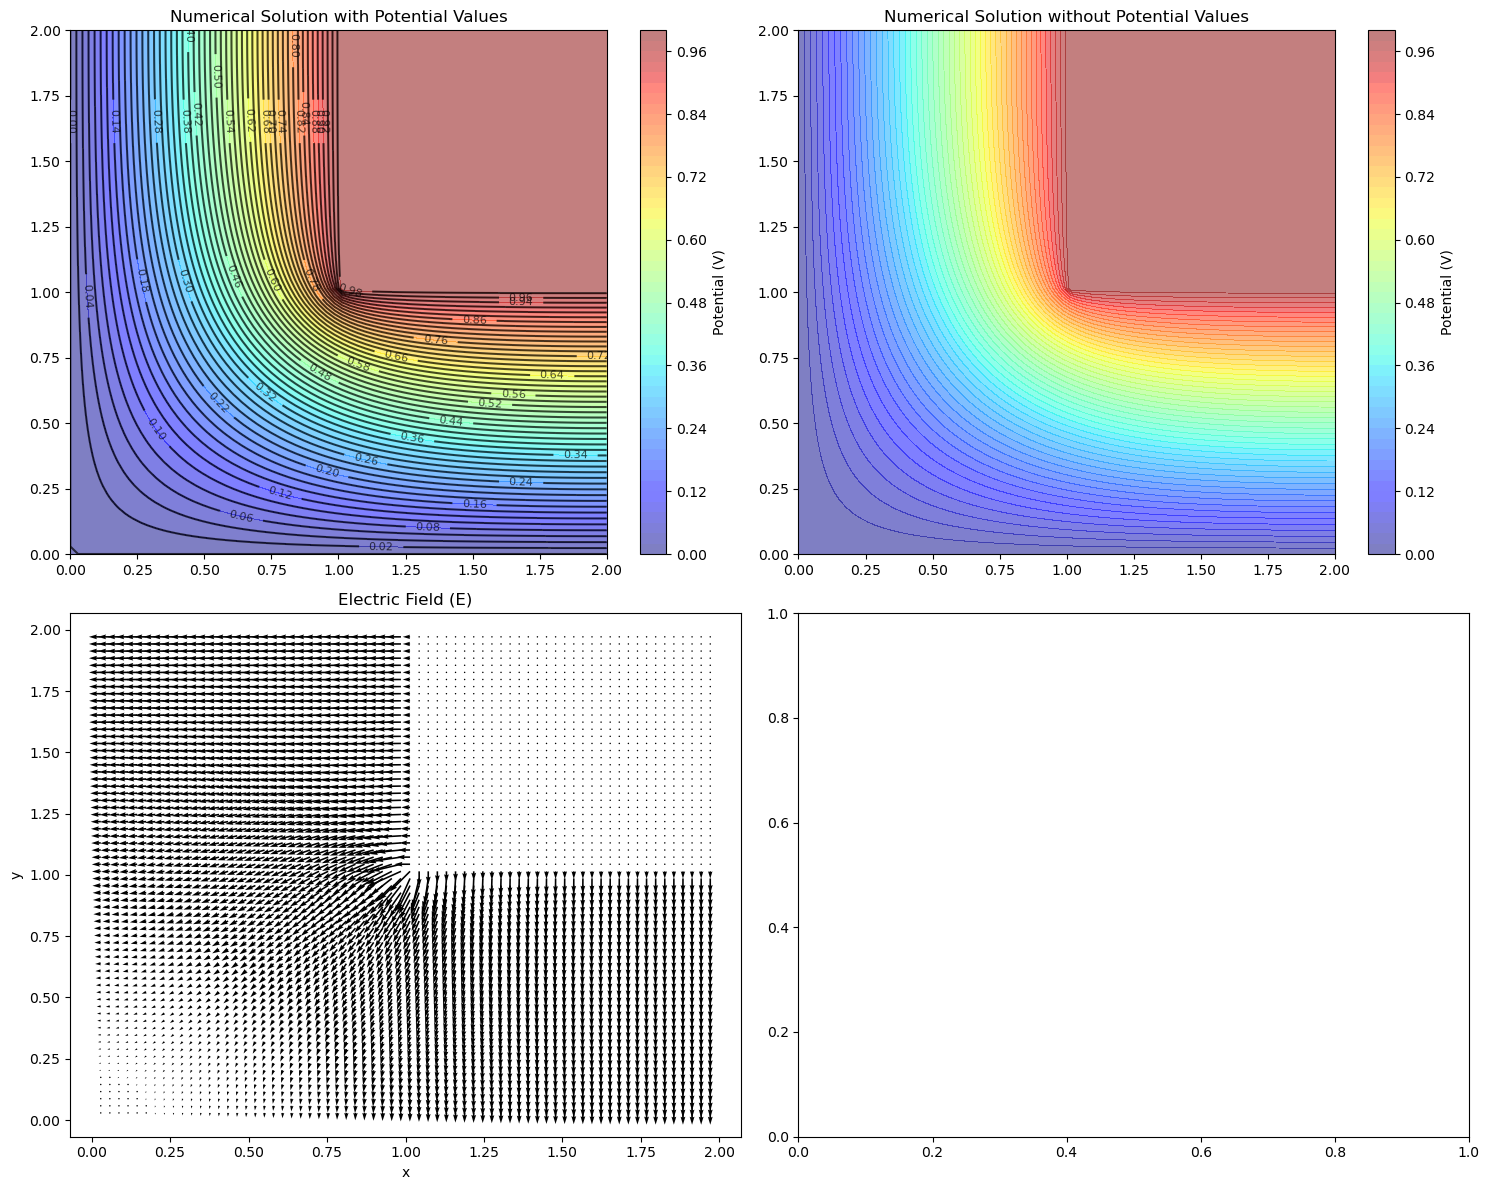

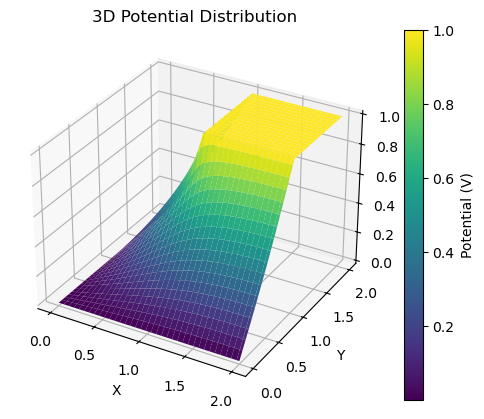

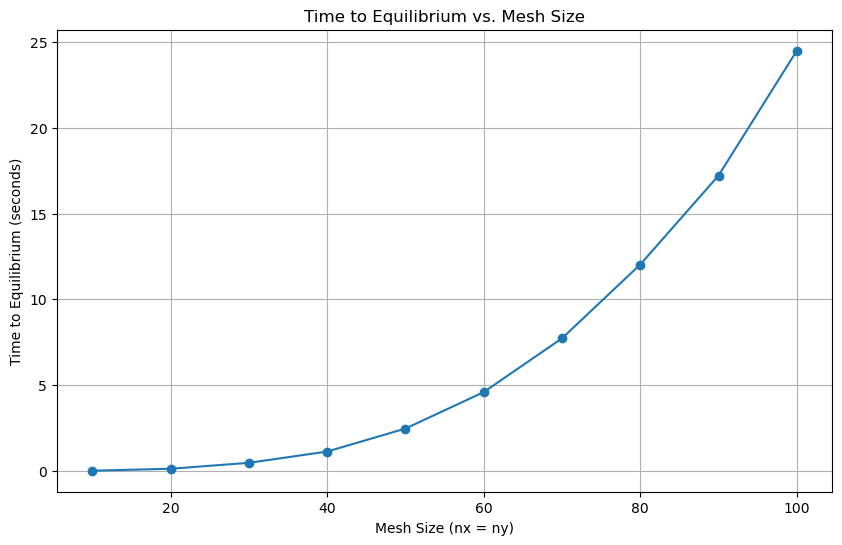

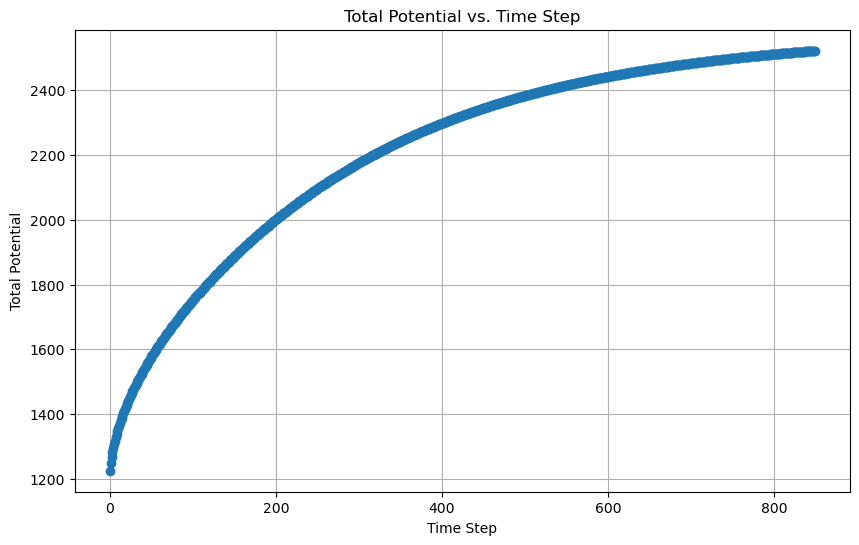

In [63]:
########    main

V_numerical,V_over_time, _ = solve_laplace(nx, ny)    # Compute numerical solution
Ex, Ey = compute_electric_field(V_numerical, dx, dy)    # Compute electric field components
plot_potential_and_field(V_numerical, Ex, Ey, X, Y)
plot_3d_potential_distribution(V_numerical, X, Y)

mesh_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
times = compute_time_to_equilibrium(mesh_sizes)
plot_time_to_equilibrium(mesh_sizes, times)
plot_potential_vs_time(V_over_time)

In [65]:
#############################################               1 راستی ازمایی 
# سمت راست و چپ  خازن باشد و شکل مربع باشد و دیگر پله نداشته باشد

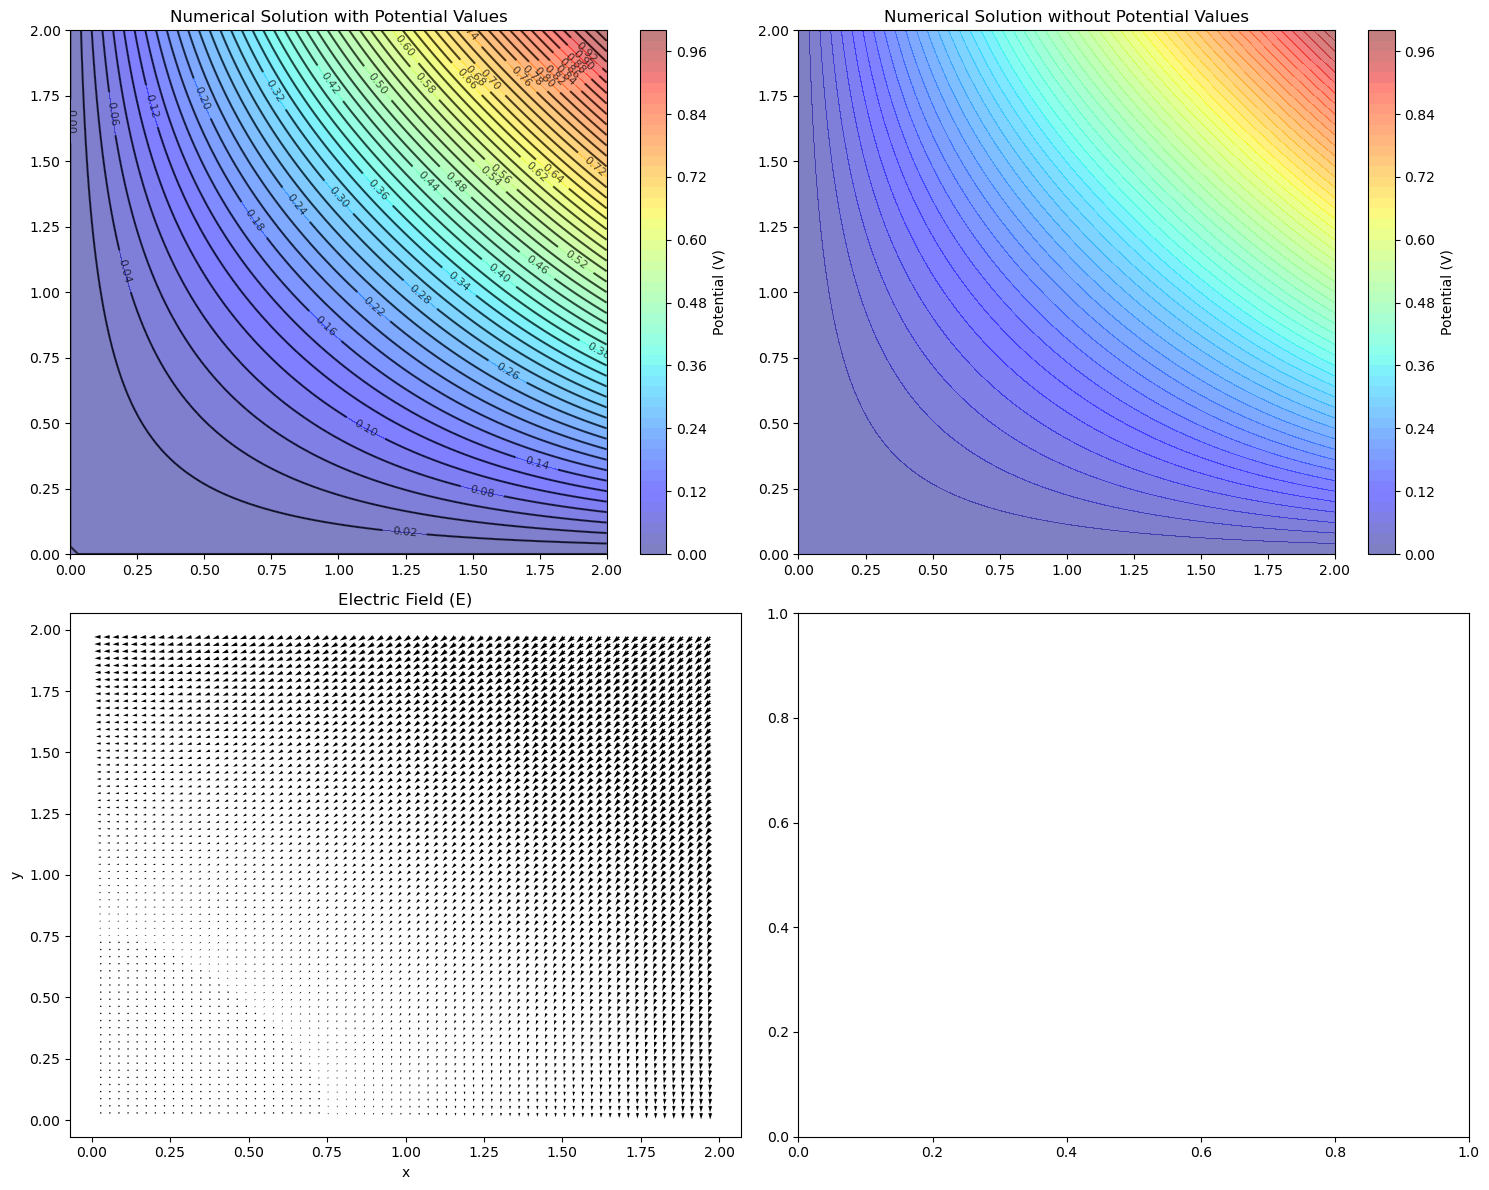

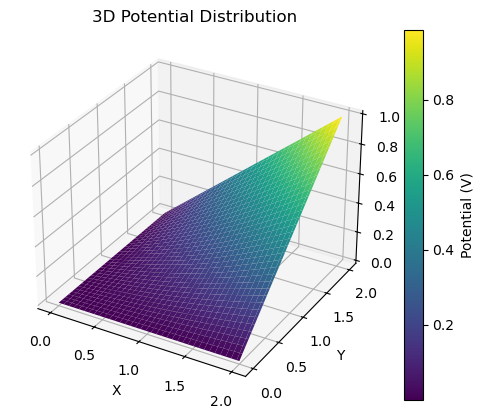

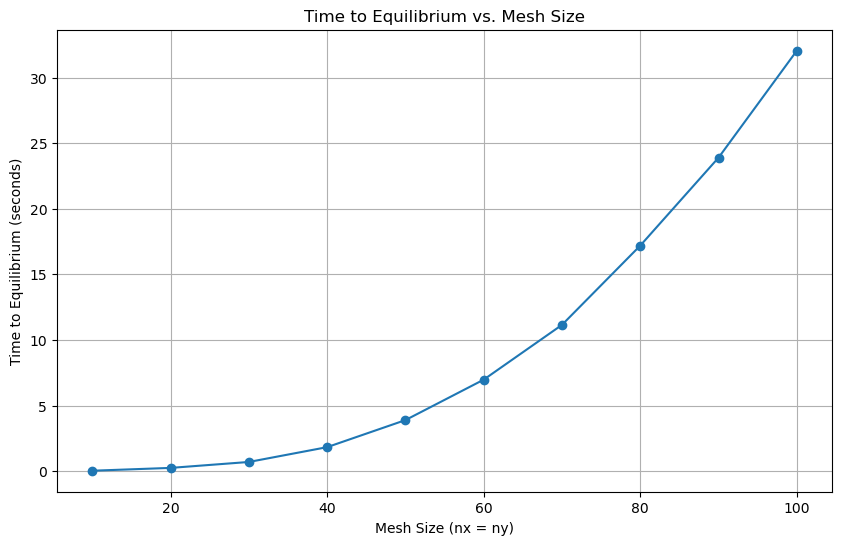

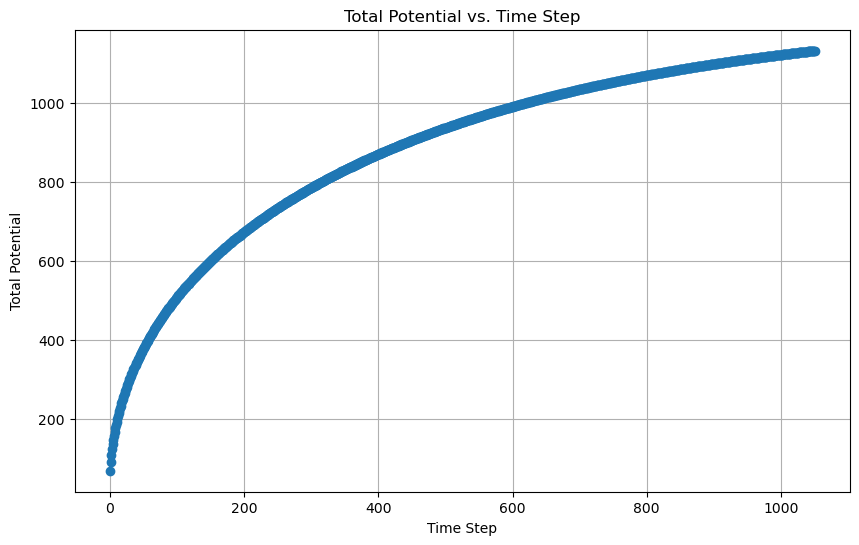

In [67]:
# Define boundary conditions as a function
def set_boundary_conditions(V, nx, ny):
    V[:, 0] = 0  # Left boundary (potential 0)
    V[0, :] = 0  # Bottom boundary (potential 0)

    # Apply Dirichlet boundary conditions (dielectric regions)
    dielectric_potential = 1.0  # Example value for dielectric potential
    V[-1, :] = np.linspace(0, dielectric_potential, nx)  # Top boundary (linear potential)
    V[:, -1] = np.linspace(0, dielectric_potential, ny)  # Right boundary (linear potential)

# Solve the Laplace equation numerically using the given update formula
def solve_laplace(nx, ny, tol=1e-4):
    V = np.zeros((ny, nx))
    # Set initial boundary conditions
    set_boundary_conditions(V, nx, ny)
    error = tol + 1
    iterations = 0
    V_over_time = [V.copy()]
    while error > tol:
        V_old = V.copy()
        for i in range(1, ny-1):
            for j in range(1, nx-1):
                V[i, j] = 0.25 * (V_old[i+1, j] + V[i-1, j] + V_old[i, j+1] + V[i, j-1])

        # Reapply boundary conditions after updating
        set_boundary_conditions(V, nx, ny)
        error = np.max(np.abs(V - V_old))
        iterations += 1
        V_over_time.append(V.copy())
    return V,V_over_time, iterations



V_numerical,V_over_time, _ = solve_laplace(nx, ny)    # Compute numerical solution
Ex, Ey = compute_electric_field(V_numerical, dx, dy)    # Compute electric field components
plot_potential_and_field(V_numerical, Ex, Ey, X, Y)
plot_3d_potential_distribution(V_numerical, X, Y)

mesh_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
times = compute_time_to_equilibrium(mesh_sizes)
plot_time_to_equilibrium(mesh_sizes, times)
plot_potential_vs_time(V_over_time)

In [69]:
#############################################              2 راستی ازمایی 
#شکل مربع است و فقط یک سمت دی الکتریک بوده و بقیه پتانسیل صفر است.

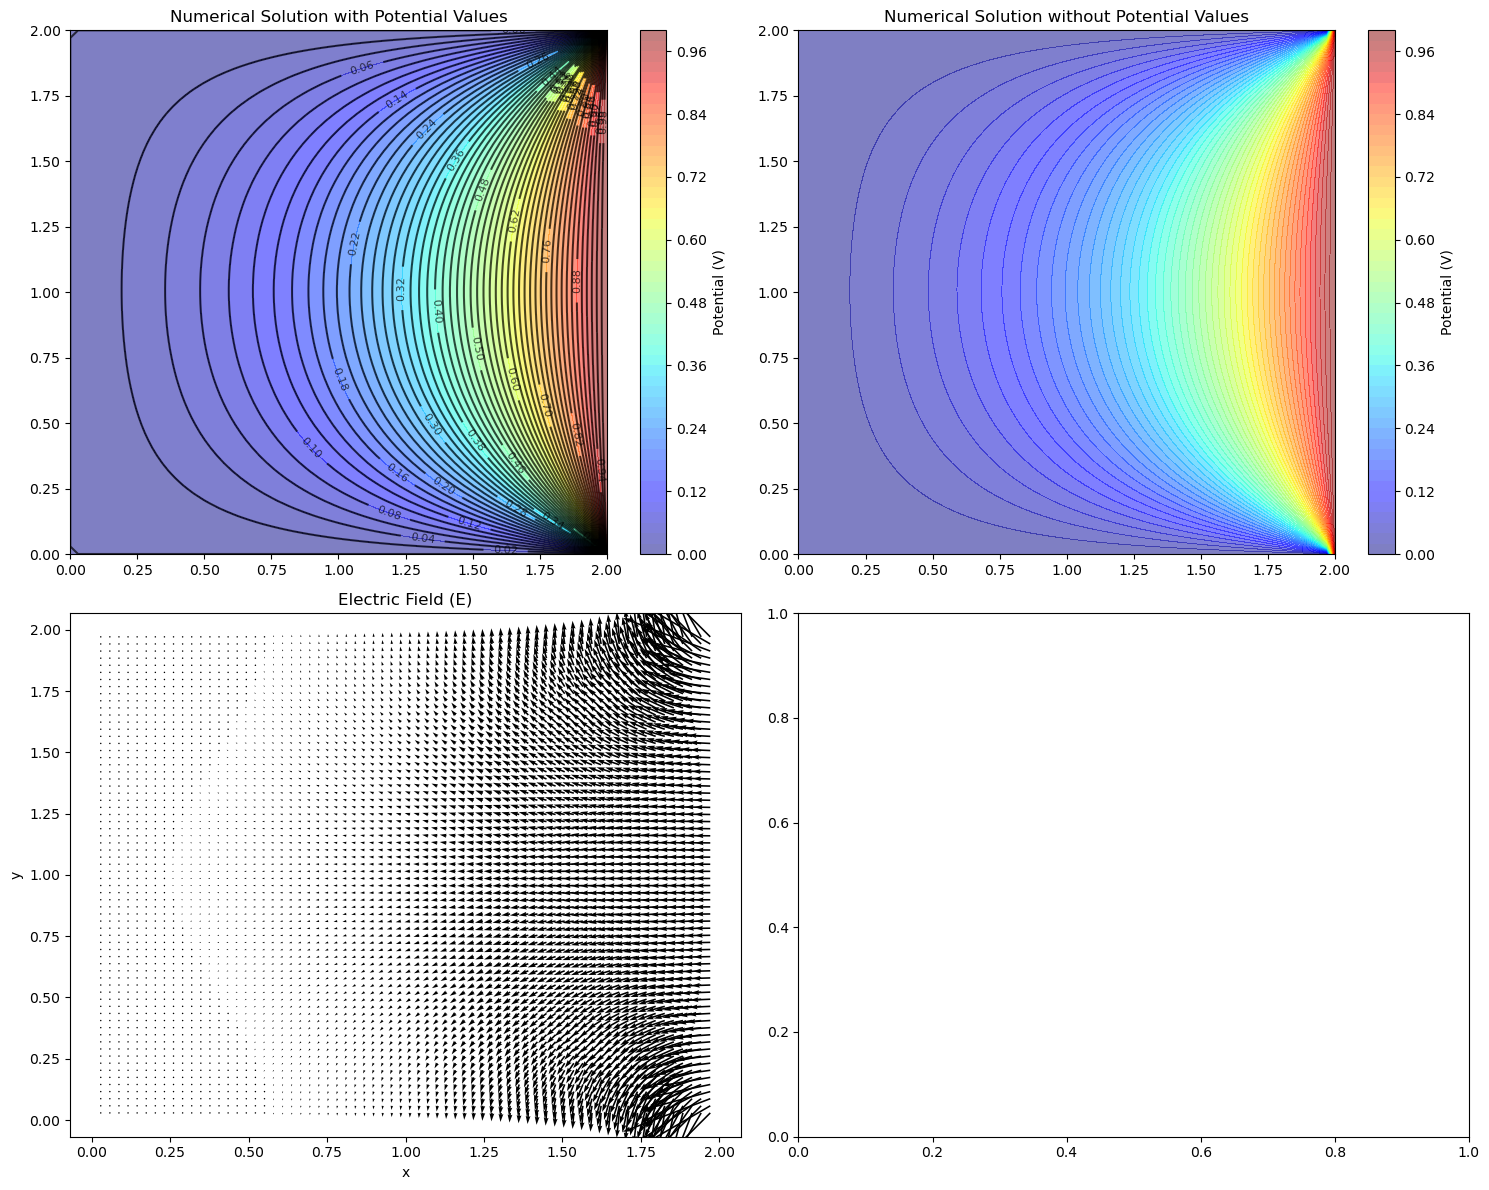

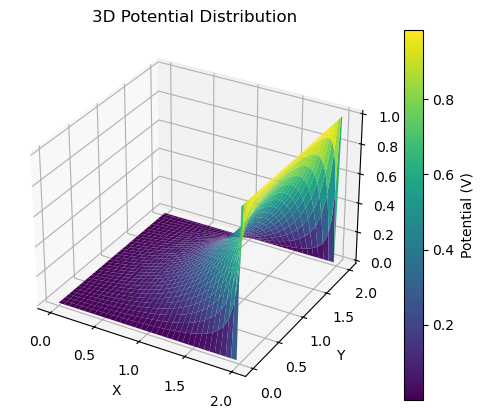

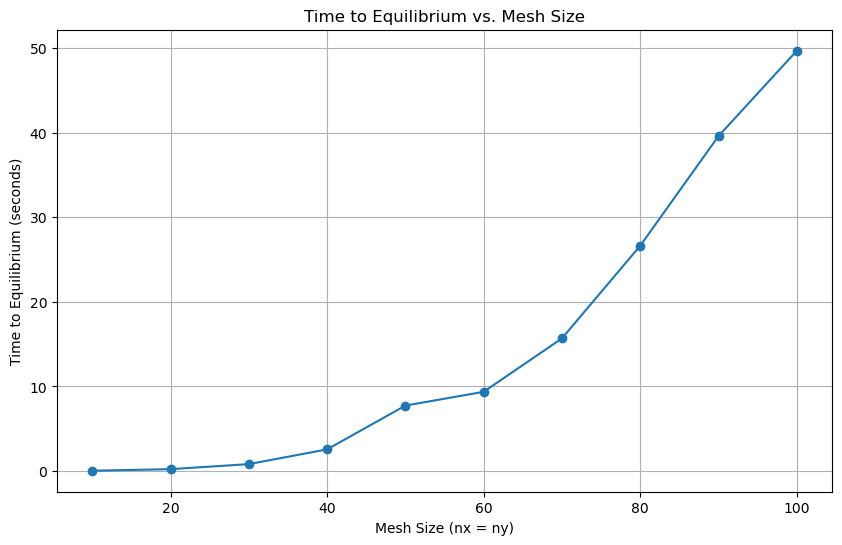

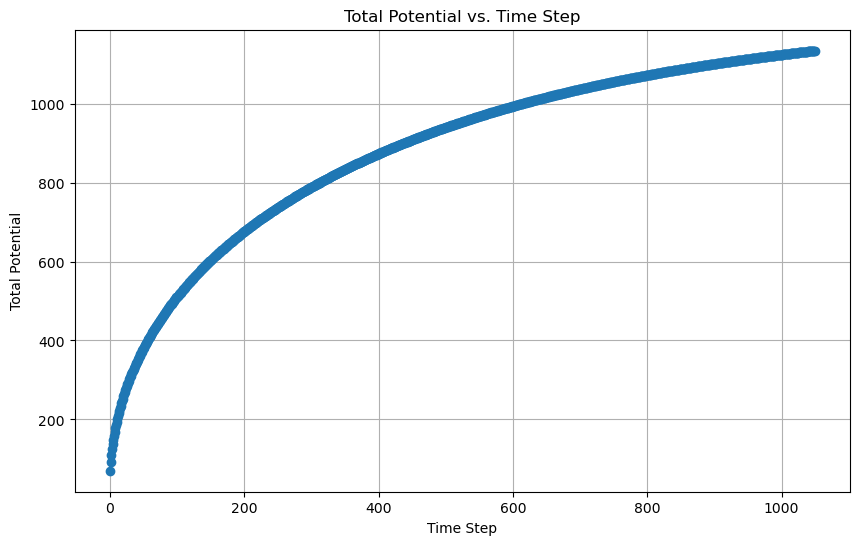

In [71]:
# Define boundary conditions as a function
def set_boundary_conditions(V, nx, ny):
    V[:, 0] = 0  # Left boundary (potential 0)
    V[0, :] = 0  # Bottom boundary (potential 0)
    V[:, -1] = 0  # Top boundary (potential 0)
    # Apply Dirichlet boundary conditions (dielectric regions)
    dielectric_potential = 1.0  # Example value for dielectric potential
    V[-1, :] =1 # np.linspace(0, dielectric_potential, nx)  # Right boundary (linear potential) 


V_numerical,V_over_time, _ = solve_laplace(nx, ny)    # Compute numerical solution
Ex, Ey = compute_electric_field(V_numerical, dx, dy)    # Compute electric field components
plot_potential_and_field(V_numerical, Ex, Ey, X, Y)
plot_3d_potential_distribution(V_numerical, X, Y)

mesh_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
times = compute_time_to_equilibrium(mesh_sizes)
plot_time_to_equilibrium(mesh_sizes, times)
plot_potential_vs_time(V_over_time)